In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *
import string
from functools import reduce

In [3]:
event_type = pd.read_csv('../Data/event_type.csv')
log_feature = pd.read_csv('../Data/log_feature.csv')
resource_type = pd.read_csv('../Data/resource_type.csv')
severity_type = pd.read_csv('../Data/severity_type.csv')
test = pd.read_csv('../Data/test.csv')
train = pd.read_csv('../Data/train.csv')

In [11]:
event_type.head()

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


In [12]:
log_feature.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [13]:
resource_type.head()

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [15]:
severity_type.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [17]:
test.head()

,id,location
0,11066,location 481
1,18000,location 962
2,16964,location 491
3,4795,location 532
4,3392,location 600


In [18]:
train.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


### EDA

### Event Type

In [20]:
event_type.columns

Index(['id', 'event_type'], dtype='object')

In [27]:
event_type.shape 

(31170, 2)

In [34]:
### Number of unique IDs
len(event_type['id'].unique())

18552

In [19]:
## Number of unique events
len(event_type['event_type'].unique())

53

In [33]:
event_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 2 columns):
id            31170 non-null int64
event_type    31170 non-null object
dtypes: int64(1), object(1)
memory usage: 487.1+ KB


In [4]:
### counting ids for each event
Event_count = pd.DataFrame(event_type.groupby(['event_type']).size()).reset_index()

In [5]:
Event_count['event_type'].replace({'event_type': ''}, inplace=True, regex=True)

In [5]:
Event_count.head()

,event_type,0
0,1,4
1,10,145
2,11,7888
3,12,6
4,13,582


#### Ideas for exploring this sheet:
1. A histogram for number of count for each event
2. A histogram for number of Ids for each event
3. for each Ids the number of Events they have
4. for each Ids the number of distinct events

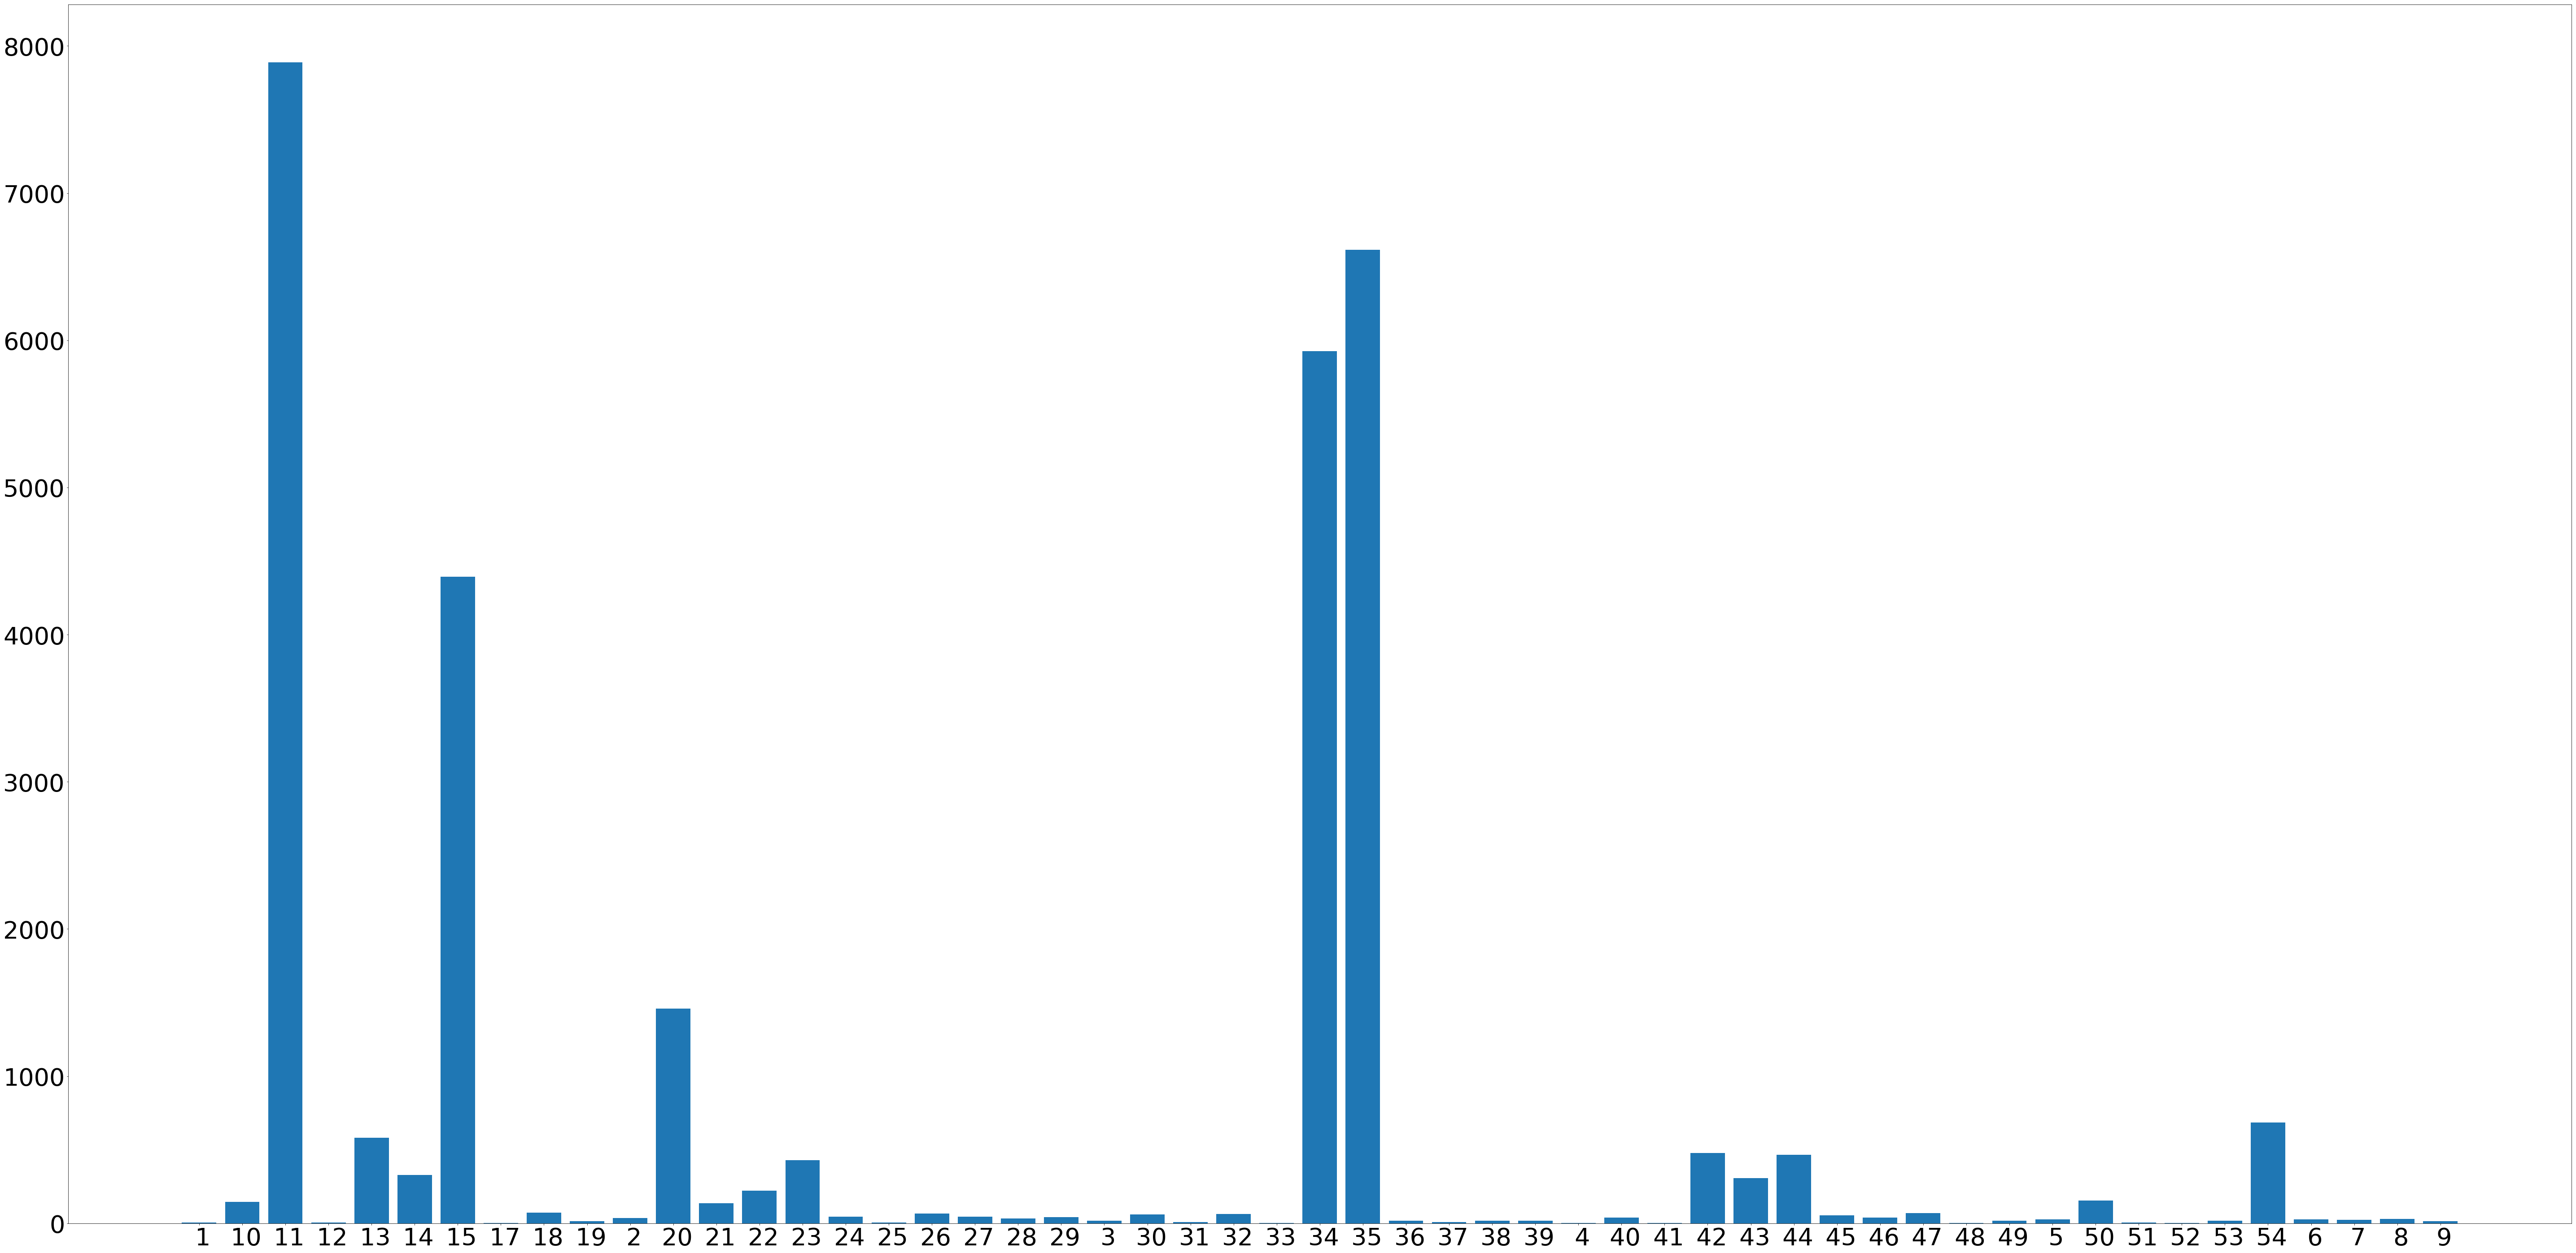

In [13]:
#Count for each event
#%matplotlib inline
plt.figure(figsize=(100, 50))
plt.bar(Event_count['event_type'],Event_count[0])
plt.tick_params(axis = 'both', which = 'major', labelsize = 54)
#plt.figure(figsize=(100, 50))
#plt.xticks(rotation='vertical')
#plt.tight_layout()
#plt.show()

In [6]:
### Count of events per ID
Id_eventCount = pd.DataFrame(event_type.groupby(['id']).size()).reset_index()
Id_eventCount.rename(columns={0: "Count"} , inplace = True)
Df_plot = pd.DataFrame(Id_eventCount.groupby(['Count']).size()).reset_index()

In [7]:
Df_plot

,Count,0
0,1,8015
1,2,8873
2,3,1375
3,4,222
4,5,34
5,6,23
6,7,2
7,8,2
8,9,3
9,10,2


Text(0,0.5,'Number of IDs')

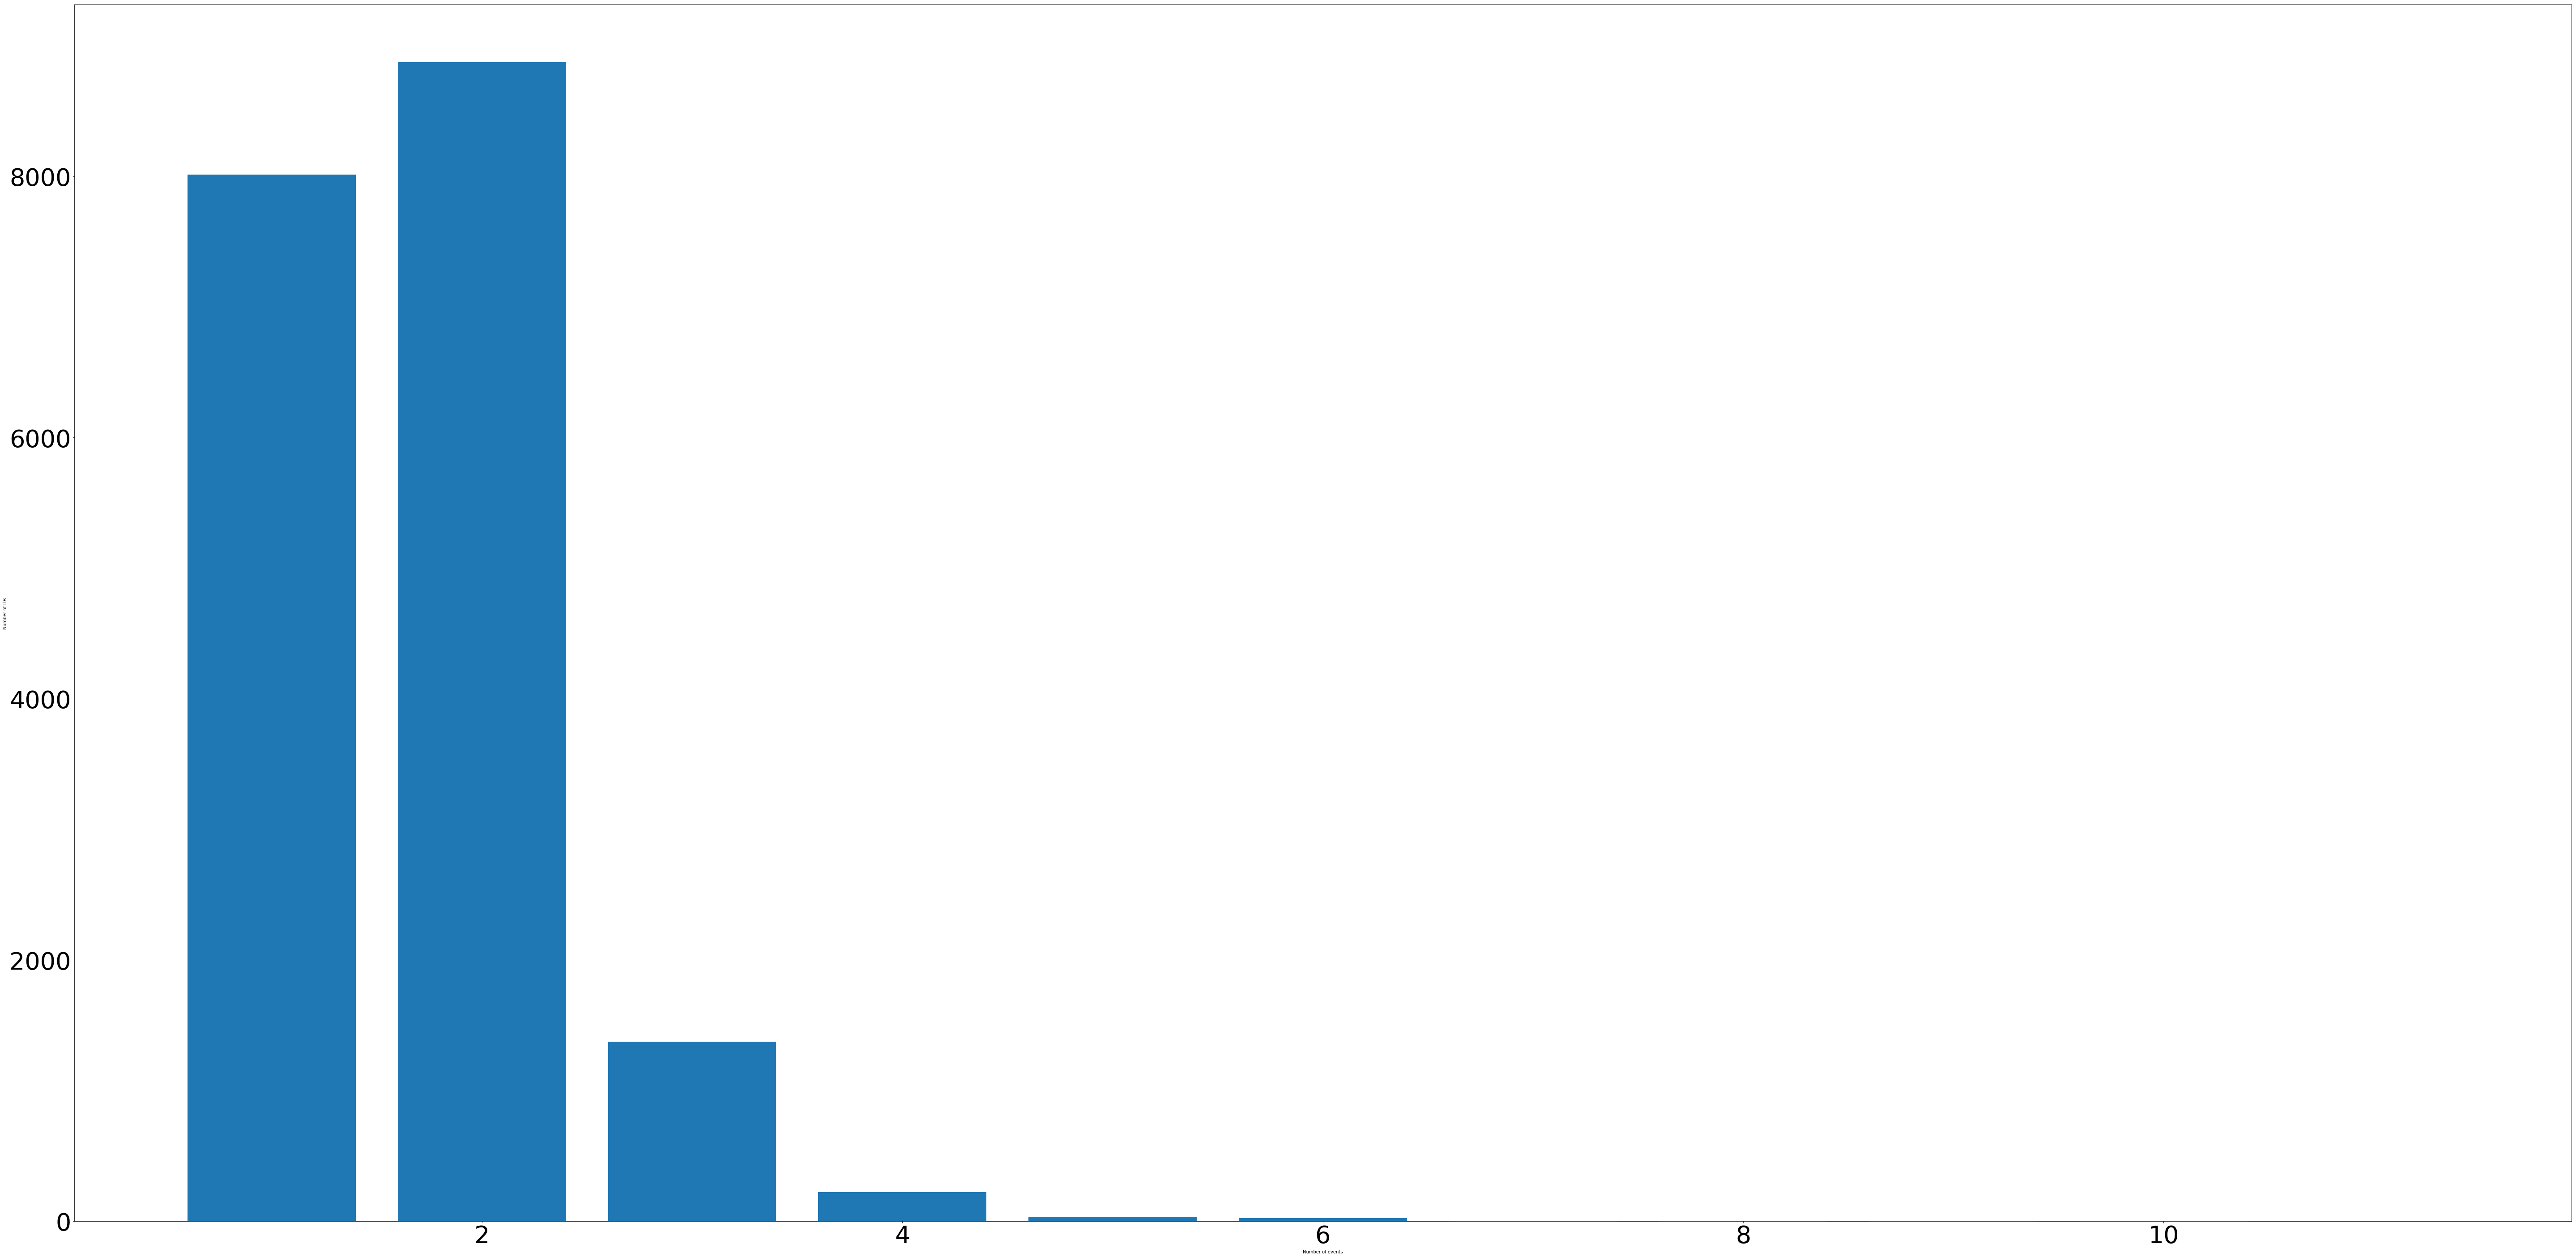

In [18]:
plt.figure(figsize=(100, 50))
plt.bar(Df_plot['Count'],Df_plot[0])
plt.tick_params(axis = 'both', which = 'major', labelsize = 54)
plt.xlabel('Number of events')
plt.ylabel('Number of IDs')

In [40]:
#event_type.set_index('id',inplace = True)

In [14]:
event_type_flattened = pd.get_dummies(event_type, columns=["event_type"])
event_type_flattened = event_type_flattened.groupby(['id']).agg(['sum'])
event_type_flattened.reset_index(inplace = True)

In [78]:
event_type_flattened[event_type_flattened['id'] == 5022]

,id,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,event_type_event_type 18,...,event_type_event_type 5,event_type_event_type 50,event_type_event_type 51,event_type_event_type 52,event_type_event_type 53,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8,event_type_event_type 9
,,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
5021,5022,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
event_type_flattened.describe()

,id,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,event_type_event_type 18,...,event_type_event_type 5,event_type_event_type 50,event_type_event_type 51,event_type_event_type 52,event_type_event_type 53,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8,event_type_event_type 9
,,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
count,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,...,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000
mean,9276.500000,0.000216,0.007816,0.425183,0.000323,0.031371,0.017788,0.236902,0.000162,0.003935,...,0.001401,0.008301,0.000216,0.000054,0.000916,0.036869,0.001509,0.001294,0.001563,0.000755
std,5355.645433,0.014682,0.088064,0.494384,0.017981,0.174324,0.132183,0.425193,0.012716,0.062607,...,0.037411,0.090733,0.014682,0.007342,0.030258,0.188446,0.038821,0.035945,0.039507,0.027461
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4638.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9276.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13914.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18552.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [155]:
event_type_flattened.isna().sum()

id                               0
event_type_event_type 1   sum    0
event_type_event_type 10  sum    0
event_type_event_type 11  sum    0
event_type_event_type 12  sum    0
event_type_event_type 13  sum    0
event_type_event_type 14  sum    0
event_type_event_type 15  sum    0
event_type_event_type 17  sum    0
event_type_event_type 18  sum    0
event_type_event_type 19  sum    0
event_type_event_type 2   sum    0
event_type_event_type 20  sum    0
event_type_event_type 21  sum    0
event_type_event_type 22  sum    0
event_type_event_type 23  sum    0
event_type_event_type 24  sum    0
event_type_event_type 25  sum    0
event_type_event_type 26  sum    0
event_type_event_type 27  sum    0
event_type_event_type 28  sum    0
event_type_event_type 29  sum    0
event_type_event_type 3   sum    0
event_type_event_type 30  sum    0
event_type_event_type 31  sum    0
event_type_event_type 32  sum    0
event_type_event_type 33  sum    0
event_type_event_type 34  sum    0
event_type_event_typ

### Train/ Test

In [25]:
len(train['id'].unique()) , train.shape , len(test['id'].unique())  , test.shape

(7381, (7381, 3), 11171, (11171, 2))

In [20]:
train.columns

Index(['id', 'location', 'fault_severity'], dtype='object')

In [21]:
train.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [26]:
test.head()

,id,location
0,11066,location 481
1,18000,location 962
2,16964,location 491
3,4795,location 532
4,3392,location 600


In [22]:
train.groupby(['fault_severity']).size()

fault_severity
0    4784
1    1871
2     726
dtype: int64

In [24]:
len(train['location'].unique())

929

In [27]:
train.groupby(['fault_severity','location']).size()

fault_severity  location     
0               location 1       14
                location 10       1
                location 100     13
                location 1000     3
                location 1002     1
                location 1005     1
                location 1006     3
                location 1007    16
                location 1008    34
                location 1009     4
                location 101      1
                location 1010    13
                location 1011     1
                location 1013     1
                location 1014     5
                location 1015     5
                location 1017     3
                location 1018    18
                location 1019    23
                location 102     36
                location 1022     1
                location 1023     3
                location 1024    16
                location 1025     5
                location 1026    13
                location 1027     1
                location 1029     

### Log

In [28]:
log_feature

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1
5,5022,feature 193,4
6,5022,feature 71,3
7,6852,feature 201,2
8,6852,feature 56,1
9,6852,feature 80,2


In [ ]:
log_feature['log_feature'] = log_feature['log_feature'].map(lambda x: x.replace(' ','_'))
log_feature['log_feature'] = log_feature['log_feature'].map(lambda x: x[8:]).astype(int)
log_feature['log_feature']

In [323]:
log_feature['log_feature'][0][8:]

'68'

In [30]:
len(log_feature['id'].unique()) , log_feature.shape

(18552, (58671, 3))

In [32]:
log_feature['volume'].max()

1310

In [33]:
len(log_feature['log_feature'].unique())

386

In [34]:
log_feature.groupby(['id']).size()

id
1         3
2         5
3         1
4         1
5         2
6         2
7         4
8         6
9         5
10        2
11        6
12        1
13        2
14        2
15        2
16        1
17        2
18        8
19        4
20        2
21        4
22        6
23        4
24        1
25        1
26        1
27        2
28        1
29       16
30        3
         ..
18523     6
18524     4
18525     4
18526     2
18527     6
18528     2
18529     2
18530     1
18531     4
18532     2
18533     2
18534     2
18535     5
18536     6
18537     3
18538     4
18539     5
18540     1
18541     2
18542     2
18543     1
18544     2
18545     2
18546     6
18547    10
18548     6
18549     6
18550     2
18551     2
18552     2
Length: 18552, dtype: int64

In [79]:
log_feature.groupby(['log_feature'])['volume'].agg(['min','max'])

,min,max
log_feature,,
feature 1,1,2
feature 10,1,14
feature 100,2,2
feature 101,6,574
feature 102,1,3
feature 103,1,662
feature 104,1,16
feature 105,14,239
feature 106,1,1


In [82]:
log_feature.describe()

,id,volume
count,58671.000000,58671.000000
mean,9271.368905,9.685296
std,5355.142878,27.314433
min,1.000000,1.000000
25%,4658.500000,1.000000
50%,9275.000000,2.000000
75%,13903.000000,7.000000
max,18552.000000,1310.000000


In [94]:
hello = log_feature.set_index(['id','log_feature'])

In [95]:
hello.index

MultiIndex(levels=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

In [9]:
log_feature_flatened = log_feature.pivot(index='id', columns='log_feature', values='volume')
log_feature_flatened.reset_index(inplace = True)
log_feature_flatened.fillna(0,inplace=True)

In [104]:
hello[hello['id'] == 6597]['feature 68']

6596    6.0
Name: feature 68, dtype: float64

In [103]:
log_feature[log_feature['id'] == 6597]

,id,log_feature,volume
0,6597,feature 68,6


### Resource Type

In [108]:
resource_type.head()

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [109]:
resource_type['resource_type'].unique()

array(['resource_type 8', 'resource_type 2', 'resource_type 1',
       'resource_type 9', 'resource_type 6', 'resource_type 7',
       'resource_type 10', 'resource_type 4', 'resource_type 3',
       'resource_type 5'], dtype=object)

In [10]:
resource_type_cnt = pd.DataFrame(resource_type.groupby(['resource_type']).size())

In [11]:
resource_type_cnt.reset_index(inplace = True)

In [12]:
resource_type_cnt

,resource_type,0
0,resource_type 1,58
1,resource_type 10,73
2,resource_type 2,8918
3,resource_type 3,145
4,resource_type 4,330
5,resource_type 5,14
6,resource_type 6,582
7,resource_type 7,498
8,resource_type 8,10268
9,resource_type 9,190


Text(0,0.5,'Number of IDs')

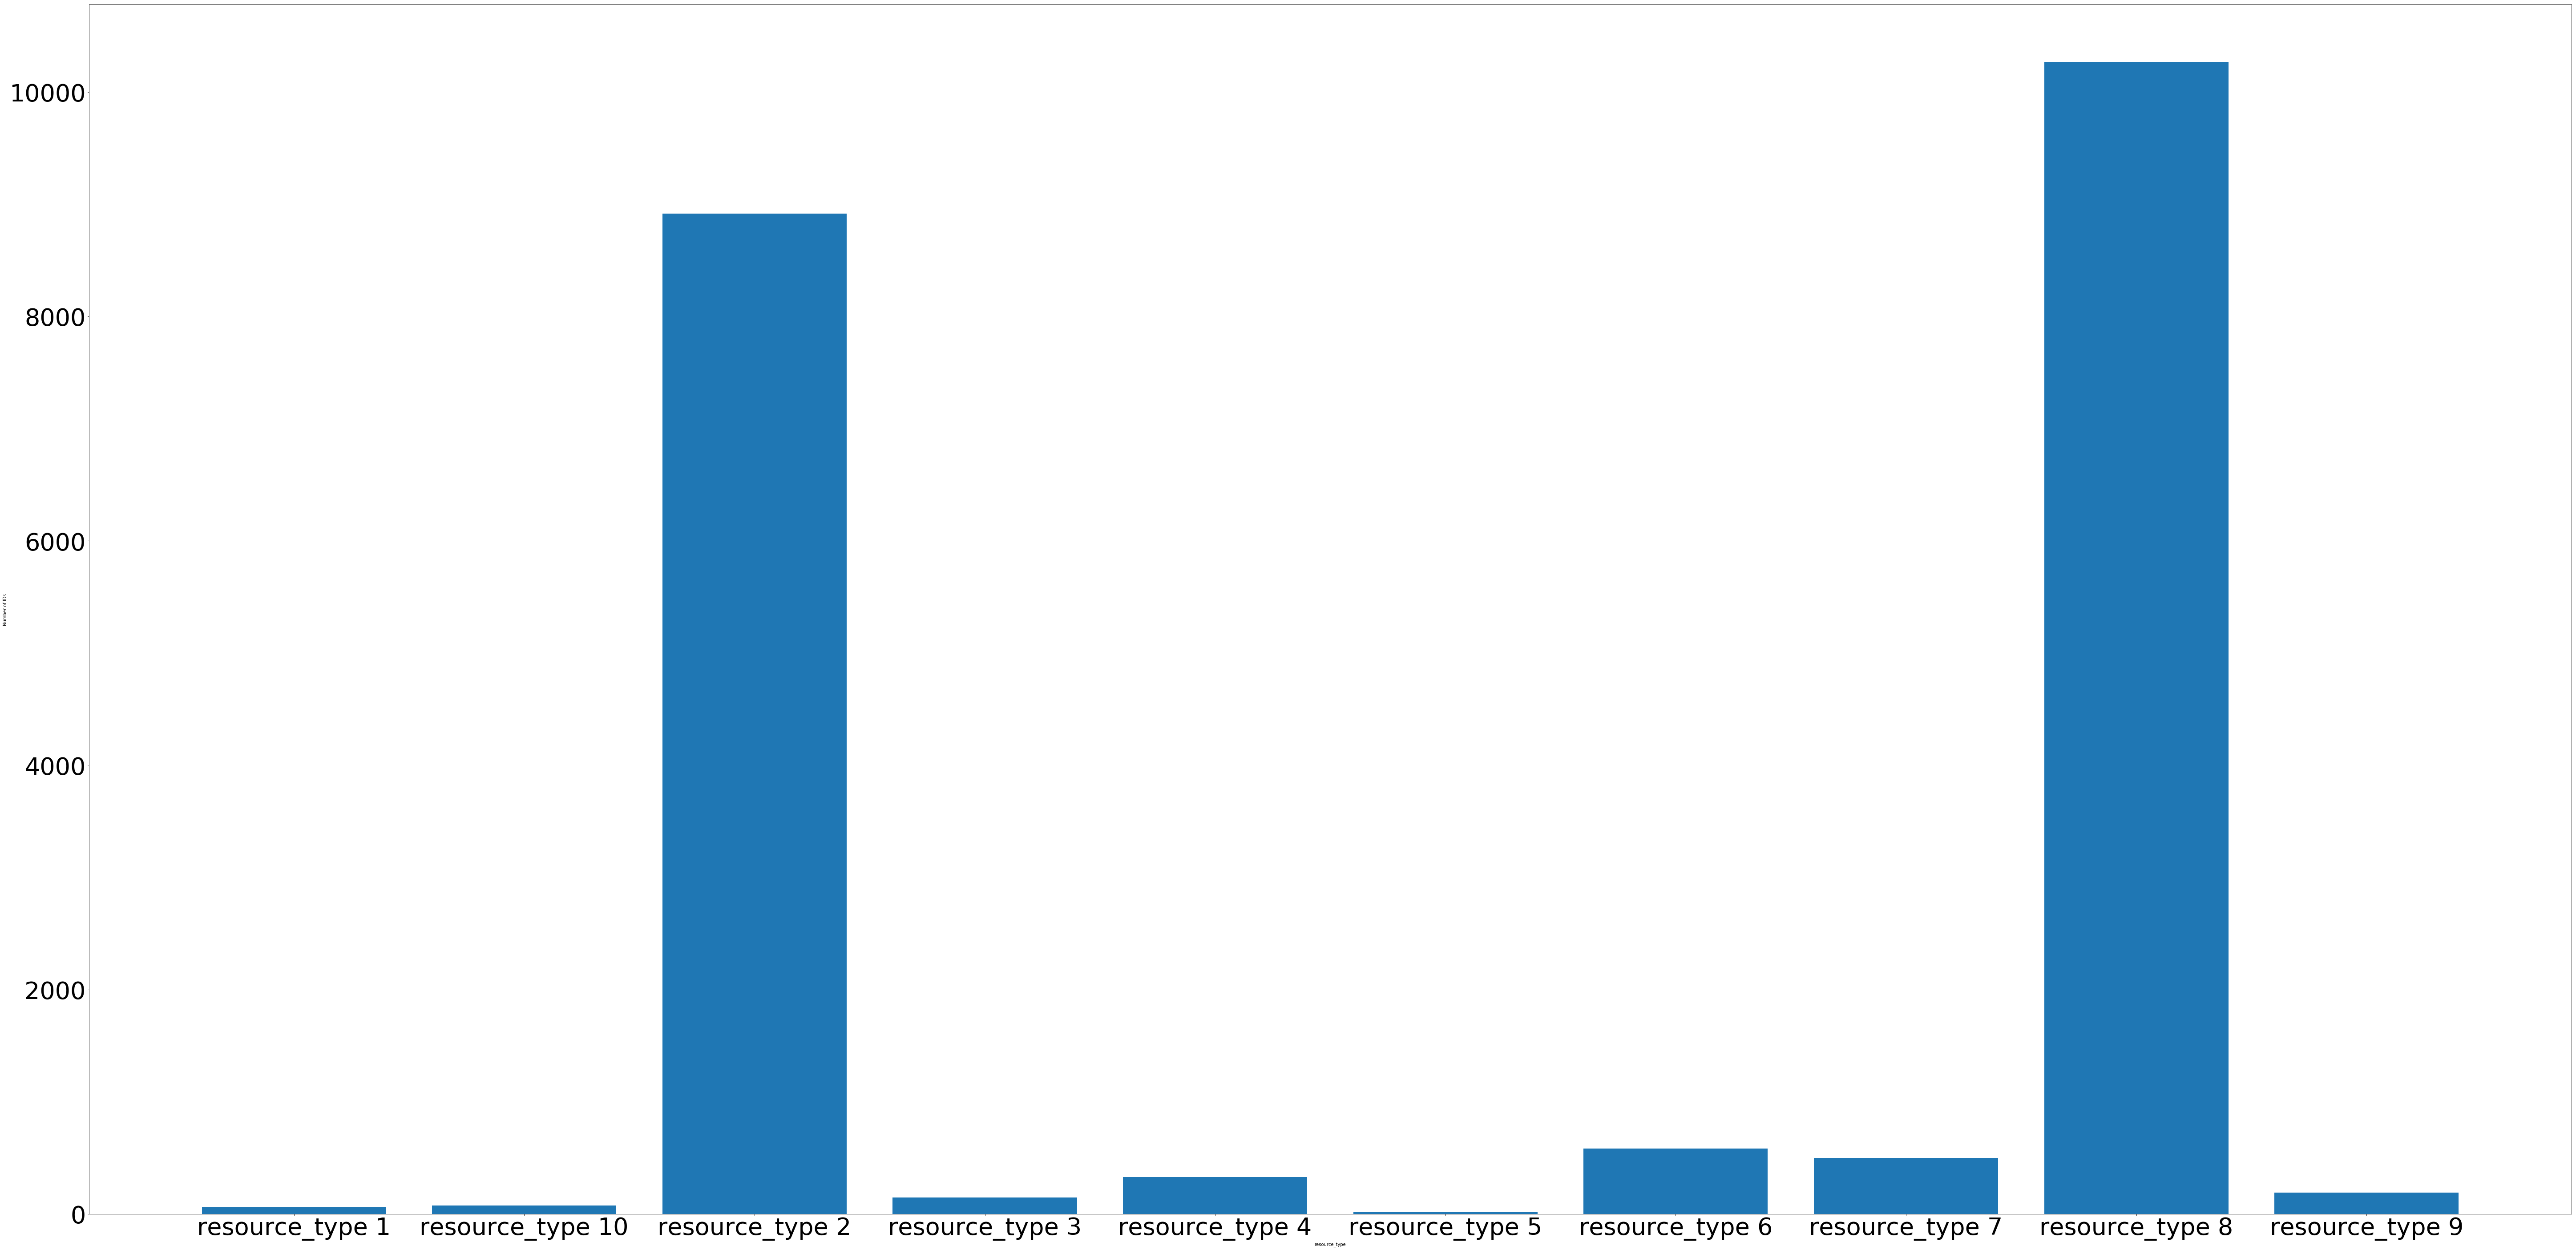

In [123]:
plt.figure(figsize=(100, 50))
plt.bar(resource_type_cnt['resource_type'],resource_type_cnt[0])
plt.tick_params(axis = 'both', which = 'major', labelsize = 54)
plt.xlabel('resource_type')
plt.ylabel('Number of IDs')

In [127]:
resource_type.head()

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [128]:
len(resource_type['id'].unique()) , resource_type.shape

(18552, (21076, 2))

In [141]:
#resource_type.set_index('id' , inplace = True)
resource_type.reset_index(inplace = True)

In [144]:
pd.DataFrame(resource_type.unstack())

0
id            0                 6597
              1                 8011
              2                 2597
              3                 5022
              4                 6852
              5                 5611
              6                14838
              7                 2588
              8                 4848
              9                 6914
              10                5337
              11               10460
              12               15494
              13               10289
              14                8587
              15               12943
              16                 590
              17               16416
              18                3399
              19                1505
              20                9446
              21               12482
              22               16538
              23                2250
              24                5259
              25                5259
              26               12751
              27                5195
              28                1233
              29                4703
...                              ...
resource_type 21046  resource_type 8
              21047  resource_type 8
              21048  resource_type 8
              21049  resource_type 8
              21050  resource_type 8
              21051  resource_type 8
              21052  resource_type 8
              21053  resource_type 8
              21054  resource_type 8
              21055  resource_type 8
              21056  resource_type 8
              21057  resource_type 8
              21058  resource_type 8
              21059  resource_type 8
              21060  resource_type 8
              21061  resource_type 2
              21062  resource_type 8
              21063  resource_type 2
              21064  resource_type 8
              21065  resource_type 8
              21066  resource_type 8
              21067  resource_type 8
              21068  resource_type 8
              21069  resource_type 8
              21070  resource_type 8
              21071  resource_type 8
              21072  resource_type 8
              21073  resource_type 8
              21074  resource_type 8
              21075  resource_type 8

[42152 rows x 1 columns]

In [13]:
Resource_type_flattened = pd.get_dummies(resource_type, columns=["resource_type"])
Resource_type_flattened = Resource_type_flattened.groupby(['id']).agg(['sum'])
Resource_type_flattened.reset_index(inplace = True)

In [151]:
Resource_type_flattened.shape

(18552, 11)

In [154]:
Resource_type_flattened.isna().sum()

id                                     0
resource_type_resource_type 1   sum    0
resource_type_resource_type 10  sum    0
resource_type_resource_type 2   sum    0
resource_type_resource_type 3   sum    0
resource_type_resource_type 4   sum    0
resource_type_resource_type 5   sum    0
resource_type_resource_type 6   sum    0
resource_type_resource_type 7   sum    0
resource_type_resource_type 8   sum    0
resource_type_resource_type 9   sum    0
dtype: int64

### severity_type

In [156]:
severity_type.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [158]:
len(severity_type['id'].unique()) , severity_type.shape

(18552, (18552, 2))

In [159]:
severity_type.groupby(['severity_type']).size()

severity_type
severity_type 1    8728
severity_type 2    8737
severity_type 3       8
severity_type 4    1014
severity_type 5      65
dtype: int64

### EDA

### DATA
#### Original Data:
* event_type
* log_feature
* resource_type
* severity_type
* test
* train

#### Transformed Data:
* event_type_flattened
* log_feature_flatened
* Resource_type_flattened

In [163]:
event_type.head() , log_feature.head() , resource_type.head() , severity_type.head()

(     id     event_type
 0  6597  event_type 11
 1  8011  event_type 15
 2  2597  event_type 15
 3  5022  event_type 15
 4  5022  event_type 11,      id  log_feature  volume
 0  6597   feature 68       6
 1  8011   feature 68       7
 2  2597   feature 68       1
 3  5022  feature 172       2
 4  5022   feature 56       1,      id    resource_type
 0  6597  resource_type 8
 1  8011  resource_type 8
 2  2597  resource_type 8
 3  5022  resource_type 8
 4  6852  resource_type 8,      id    severity_type
 0  6597  severity_type 2
 1  8011  severity_type 2
 2  2597  severity_type 2
 3  5022  severity_type 1
 4  6852  severity_type 1)

In [164]:
event_type_flattened.head()

,id,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,event_type_event_type 18,...,event_type_event_type 5,event_type_event_type 50,event_type_event_type 51,event_type_event_type 52,event_type_event_type 53,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8,event_type_event_type 9
,,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
log_feature_flatened.head()

log_feature,id,feature 1,feature 10,feature 100,feature 101,feature 102,feature 103,feature 104,feature 105,feature 106,...,feature 90,feature 91,feature 92,feature 93,feature 94,feature 95,feature 96,feature 97,feature 98,feature 99
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
Resource_type_flattened.head()

,id,resource_type_resource_type 1,resource_type_resource_type 10,resource_type_resource_type 2,resource_type_resource_type 3,resource_type_resource_type 4,resource_type_resource_type 5,resource_type_resource_type 6,resource_type_resource_type 7,resource_type_resource_type 8,resource_type_resource_type 9
,,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,1,0,0,0,0,0,0,1,0,1,0
1,2,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,1,0
3,4,0,0,1,0,0,0,0,0,0,0
4,5,0,0,1,0,0,0,0,0,0,0


### ADS Creation and Feature extraction

### Ideas for Features extraction
* Number of events/feature/resource occured
* Most used events/feature/resource occured --- Not applicable no duplication
* Volume of feature / max value of feature
* sum of total volume
* Max events/feature/resource
* Severity number
* location

In [15]:
## Number of events/feature/resource occured
Event_count_feature = pd.DataFrame(event_type.groupby(['id']).size()).reset_index()
Feature_count_feature = pd.DataFrame(log_feature.groupby(['id']).size()).reset_index()
Resource_count_feature = pd.DataFrame(resource_type.groupby(['id']).size()).reset_index()

In [16]:
## Volume of feature / max value of feature
max_volume_feature = pd.DataFrame(log_feature.groupby(['log_feature'])['volume'].agg(['max'])).reset_index()

log_feature2 = log_feature.merge(max_volume_feature,how = 'left' , on = 'log_feature')
log_feature2['volume_ratio'] = log_feature2['volume'] / log_feature2['max']

log_feature2_flatened = log_feature2.pivot(index='id', columns='log_feature', values='volume_ratio')
log_feature2_flatened.reset_index(inplace = True)
log_feature2_flatened.fillna(0,inplace=True)

In [17]:
## Sum of total volume
volume = pd.DataFrame(log_feature.groupby(['id'])['volume'].agg(['sum'])).reset_index()

In [18]:
## Max events/feature/resource
event_type['event_number'] = event_type['event_type'].str.slice(-2)
event_type['event_number'] = event_type['event_number'].astype(np.int64)
max_event_number = pd.DataFrame(event_type.groupby(['id'])['event_number'].agg(['max'])).reset_index()


In [19]:
## Severity number
severity_type['severity_type_number'] = severity_type['severity_type'].str.slice(-1)
severity_type['severity_type_number'] = severity_type['severity_type_number'].astype(np.int64)

In [20]:
## location
train['location_number'] = train['location'].str.slice(-3)
train['location_number'] = train['location_number'].apply(lambda x: x.lstrip('n'))
train['location_number'] = train['location_number'].astype(np.int64)

test['location_number'] = test['location'].str.slice(-3)
test['location_number'] = test['location_number'].apply(lambda x: x.lstrip('n'))
test['location_number'] = test['location_number'].astype(np.int64)

### ADS Creation

In [21]:
dfs = [train, event_type_flattened, log_feature_flatened, Resource_type_flattened , Event_count_feature , Feature_count_feature , Resource_count_feature
      , log_feature2_flatened , volume , max_event_number , severity_type  ]

dfs_test = [test, event_type_flattened, log_feature_flatened, Resource_type_flattened , Event_count_feature , Feature_count_feature , Resource_count_feature
      , log_feature2_flatened , volume , max_event_number , severity_type  ]

In [22]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='id'), dfs)
df_final_test = reduce(lambda left,right: pd.merge(left,right,on='id'), dfs_test)

/Users/ha186015/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:558: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/Users/ha186015/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2530: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [248]:
len(train['id'].unique()) , train.shape

(7381, (7381, 4))

In [274]:
len(test['id'].unique()) , test.shape

(11171, (11171, 3))

In [249]:
len(event_type_flattened['id'].unique()) , event_type_flattened.shape

(18552, (18552, 54))

In [250]:
len(log_feature_flatened['id'].unique()) , log_feature_flatened.shape

(18552, (18552, 387))

In [251]:
len(Resource_type_flattened['id'].unique()) , Resource_type_flattened.shape

(18552, (18552, 11))

In [252]:
len(Event_count_feature['id'].unique()) , Event_count_feature.shape

(18552, (18552, 2))

In [253]:
len(Feature_count_feature['id'].unique()) , Feature_count_feature.shape

(18552, (18552, 2))

In [254]:
len(Resource_count_feature['id'].unique()) , Resource_count_feature.shape

(18552, (18552, 2))

In [255]:
len(log_feature2_flatened['id'].unique()) , log_feature2.shape

(18552, (58671, 5))

In [256]:
len(volume['id'].unique()) , volume.shape

(18552, (18552, 2))

In [257]:
len(max_event_number['id'].unique()) , max_event_number.shape

(18552, (18552, 2))

In [258]:
len(severity_type['id'].unique()) , severity_type.shape

(18552, (18552, 3))

In [259]:
df_final

,id,location,fault_severity,location_number,"(event_type_event_type 1, sum)","(event_type_event_type 10, sum)","(event_type_event_type 11, sum)","(event_type_event_type 12, sum)","(event_type_event_type 13, sum)","(event_type_event_type 14, sum)",...,feature 94_y,feature 95_y,feature 96_y,feature 97_y,feature 98_y,feature 99_y,sum,max,severity_type,severity_type_number
0,14121,location 118,1,118,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,38,35,severity_type 2,2
1,9320,location 91,0,91,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,316,35,severity_type 2,2
2,14394,location 152,1,152,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,2,35,severity_type 2,2
3,8218,location 931,1,931,0,0,1,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,22,15,severity_type 1,1
4,14804,location 120,0,120,0,0,1,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,12,36,severity_type 1,1
5,1080,location 664,0,664,0,0,1,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,16,11,severity_type 1,1
6,9731,location 640,0,640,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,3,50,severity_type 4,4
7,15505,location 122,0,122,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,14,35,severity_type 2,2
8,3443,location 263,1,263,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,2,35,severity_type 2,2
9,13300,location 613,1,613,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,31,54,severity_type 1,1


In [272]:
df_final_test

,id,location,location_number,"(event_type_event_type 1, sum)","(event_type_event_type 10, sum)","(event_type_event_type 11, sum)","(event_type_event_type 12, sum)","(event_type_event_type 13, sum)","(event_type_event_type 14, sum)","(event_type_event_type 15, sum)",...,feature 94_y,feature 95_y,feature 96_y,feature 97_y,feature 98_y,feature 99_y,sum,max,severity_type,severity_type_number
0,11066,location 481,481,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,98,35,severity_type 2,2
1,18000,location 962,962,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,29,15,severity_type 1,1
2,16964,location 491,491,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,21,35,severity_type 2,2
3,4795,location 532,532,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,27,severity_type 5,5
4,3392,location 600,600,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,8,15,severity_type 2,2
5,3795,location 794,794,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,23,severity_type 1,1
6,2881,location 375,375,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,15,35,severity_type 2,2
7,1903,location 638,638,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,42,44,severity_type 1,1
8,5245,location 690,690,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,11,severity_type 1,1
9,6726,location 893,893,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,50,severity_type 4,4


In [260]:
len(df_final['id'].unique()) , df_final.shape

(7381, (7381, 846))

In [273]:
len(df_final_test['id'].unique()) , df_final_test.shape

(11171, (11171, 845))

In [261]:
df_final[df_final['id'] == 14121]

,id,location,fault_severity,location_number,"(event_type_event_type 1, sum)","(event_type_event_type 10, sum)","(event_type_event_type 11, sum)","(event_type_event_type 12, sum)","(event_type_event_type 13, sum)","(event_type_event_type 14, sum)",...,feature 94_y,feature 95_y,feature 96_y,feature 97_y,feature 98_y,feature 99_y,sum,max,severity_type,severity_type_number
0,14121,location 118,1,118,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,38,35,severity_type 2,2


In [289]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7381 entries, 0 to 7380
Columns: 844 entries, id to severity_type_number
dtypes: float64(772), int64(9), uint8(63)
memory usage: 44.5 MB


In [23]:
df_final.select_dtypes(include='object')
df_final.drop(['location', 'severity_type'], axis=1 , inplace = True)
df_final_test.drop(['location', 'severity_type'], axis=1 , inplace = True)

### Variables exploration

### Modelling

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics, cross_validation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

/Users/ha186015/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
X = df_final.loc[:, df_final.columns != 'fault_severity']
y = df_final['fault_severity']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [ ]:
### Gradient boost trees
GTC = GradientBoostingClassifier().fit(X_train,y_train)
y_test_predict_GTC = GTC.predict(X_test)
accuracy_score(y_test, y_test_predict_GTC)
cross_val_score(GTC, X, y, cv=5, scoring = 'neg_log_loss')

In [295]:
### Random Forest trees
RF = RandomForestClassifier().fit(X_train,y_train)
y_test_predict_RF = RF.predict(X_test)
accuracy_score(y_test, y_test_predict_RF)
cross_val_score(RF, X, y, cv=5, scoring = 'log_loss')

array([0.73139378, 0.73644986, 0.7296748 , 0.73780488, 0.74169492])

In [296]:
### Logistic Regression
LR = LogisticRegression().fit(X_train,y_train)
y_test_predict_LR = LR.predict(X_test)
accuracy_score(y_test, y_test_predict_LR)
cross_val_score(LR, X, y, cv=5, scoring = 'log_loss')

array([0.69215156, 0.69376694, 0.68766938, 0.67750678, 0.69220339])

In [297]:
### Predict Testing
test_prediction = GTC.predict_proba(df_final_test)
test_prediction = pd.DataFrame(test_prediction)
test_prediction['id'] = test['id']
test_prediction = test_prediction[['id',0,1,2]]
test_prediction.rename( columns={0: "predict_0", 1: "predict_1" , 2: "predict_2"} , inplace = True)
#test_prediction[:,1]

array([[0.96967542, 0.02289398, 0.0074306 ],
       [0.31718232, 0.1454831 , 0.53733459],
       [0.97344186, 0.02044543, 0.00611271],
       ...,
       [0.42808645, 0.54462443, 0.02728912],
       [0.85021389, 0.14197092, 0.00781519],
       [0.58379602, 0.39994767, 0.01625632]])

In [321]:
test_prediction.to_csv('../Data/exported/test_predictions.csv')